In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#parameter
Dr = 0.17
Dt = 0.2
omega = 0
v = 30
delta_t = 0.01
n_realizations = 100

#parameter for gaussian
mu = 0
sigma = np.sqrt(delta_t)

In [16]:
#Euler scheme
def euler_one_traj(N_time, mu, sigma, delta_t, Dr, Dt):
    #initial condition
    theta_init = 0
    x_init = 0
    y_init = 0
    theta_traj = np.array([])
    x_traj = np.array([])
    y_traj = np.array([])
    
    theta = theta_init  
    x = x_init
    y = y_init
    theta_traj = np.append(theta_traj, theta)
    x_traj = np.append(x_traj, x)
    y_traj = np.append(y_traj, y)

    for i in range(N_time-1):
        s1 = np.random.normal(mu, sigma)
        s2 = np.random.normal(mu, sigma)
        s3 = np.random.normal(mu, sigma)
        theta = theta + omega*delta_t + np.sqrt(2*Dr)*s1
        x = x + v*np.cos(theta)*delta_t + np.sqrt(2*Dt)*s2
        y = y + v*np.sin(theta)*delta_t + np.sqrt(2*Dt)*s3
        
        theta_traj = np.append(theta_traj,theta)
        x_traj = np.append(x_traj, x)
        y_traj = np.append(y_traj, y)
    return theta_traj, x_traj, y_traj


In [17]:
def traj_n_realizations(t_max):
    t_min = 0.0
    N_time = int((t_max-t_min)/delta_t +1)
    time = np.linspace(t_min, t_max, N_time)

    traj_theta_list = []
    traj_x_list = []
    traj_y_list = []
    for n in range(n_realizations):
        theta_traj, x_traj, y_traj = euler_one_traj(N_time, mu, sigma, delta_t, Dr, Dt)
        traj_theta_list.append(theta_traj)
        traj_x_list.append(x_traj)
        traj_y_list.append(y_traj)
    return traj_theta_list, traj_x_list, traj_y_list, time

In [18]:
traj_theta_list, traj_x_list, traj_y_list, time = traj_n_realizations(10)

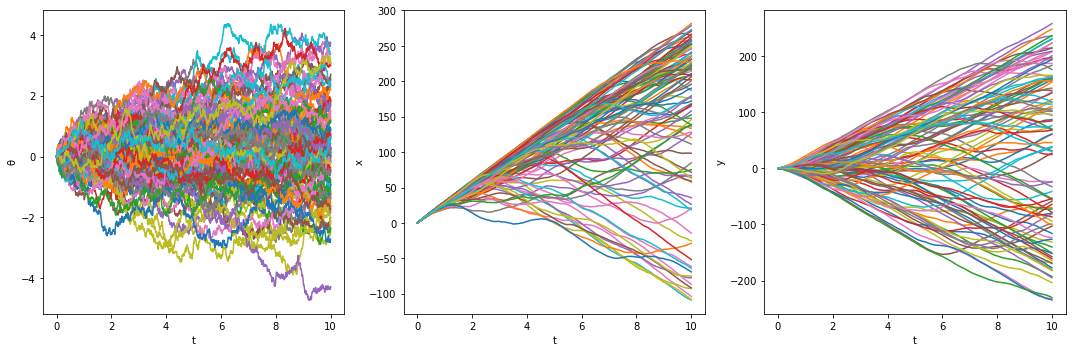

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in traj_theta_list:
    ax[0].plot(time, i)

for j in traj_x_list:
    ax[1].plot(time, j)
    
for k in traj_y_list:
    ax[2].plot(time, k)



ax[0].set_xlabel('t')
ax[0].set_ylabel('θ')
ax[1].set_xlabel('t')
ax[1].set_ylabel('x')
ax[2].set_xlabel('t')
ax[2].set_ylabel('y')

plt.tight_layout()
plt.savefig('prob_1d_omega0_100.png', dpi=300)
plt.show()

end